In [ ]:
import requests
from bs4 import BeautifulSoup
import time

# # 수집할 페이지 수 지정
# num_pages = int(input("수집할 페이지 수를 입력해주세요: "))
num_pages = 5
# 검색어와 기본 URL
query = input("검색할 뉴스 키워드를 입력하세요: ")
url_base = "https://search.naver.com/search.naver"

# 페이지별 기사 제목 수집
articles_title = []

for page in range(1, num_pages+1):
    # 페이지 URL 만들기
    params = {
        "where": "news",
        "query": query,
        "start": (page-1)*10 + 1
    }
    response = requests.get(url_base, params=params)
    soup = BeautifulSoup(response.text, "html.parser")
    time.sleep(5)

articles_list = soup.find_all("div", {"class": "news_wrap api_ani_send"})
for article in articles_list:
    # 기사 링크 수집
    link = article.find("a", {"class": "news_tit"})["href"]
    
    #기사 제목 수집
    # title = article.find("a", {"class": "news_tit"}).text
    # articles_title.append(title)
    # 기사 본문 수집
    article_response = requests.get(link)
    article_soup = BeautifulSoup(article_response.text, "html.parser")
    content = article_soup.find("div", {"class": "article_content"}).text.strip()
    
    # 결과 저장
    article.append({
        "title": title,
        "content": content
    })
    
file_name = f"{query}.txt"
with open(file_name, "w", encoding="utf-8") as file:
    for article in content:
         file.write(article["content"] + "\n")

file_path = 'C://Users//user//Desktop//축제데이터//' + file_name
print("뉴스 기사 제목과 본문이", file_name, "파일로 저장되었습니다.")

In [43]:
import requests
from bs4 import BeautifulSoup
import time

# # 수집할 페이지 수 지정
# num_pages = int(input("수집할 페이지 수를 입력해주세요: "))
num_pages = 10
# 검색어와 기본 URL
query = input("검색할 뉴스 키워드를 입력하세요: ")
url_base = "https://search.naver.com/search.naver"

# 페이지별 기사 제목 수집
articles_title = []

for page in range(1, num_pages+1):
    # 페이지 URL 만들기
    params = {
        "where": "news",
        "query": query,
        "start": (page-1)*10 + 1
    }
    response = requests.get(url_base, params=params)
    soup = BeautifulSoup(response.text, "html.parser")
    time.sleep(5)
    
    # 기사 목록 수집
    articles_list = soup.find_all("div", {"class": "news_wrap api_ani_send"})
    for article in articles_list:
        # 제목 수집
        title = article.find("a", {"class": "news_tit"}).text
        articles_title.append(title)
        
        
        
# 결과를 텍스트 파일로 저장

file_name = f"{query}.txt"
with open(file_name, "w", encoding="utf-8") as file:
    for title in articles_title:
        file.write(title + "\n")
file.savefig = 'C://Users//user//Desktop//축제데이터//'+file_name+'.txt'
print("뉴스 기사 제목이", file_name, "파일로 저장되었습니다.")

뉴스 기사 제목이 횡성한우축제.txt 파일로 저장되었습니다.


['치악산', '한우', '돈', '축제', '저녁', '생생', '정보', '맛집', '한우', '육회', '막국수', '횡성', '소', '맥', '페스티벌', '힙합', '추가', '힙합', '배틀', '횡성', '문화', '관광', '재단', '횡성', '한우', '축제', '총감독', '현식', '감독', '선임', '횡성', '한우', '축제', '총감독', '현식', '감독', '선임', '횡성', '한우', '대한민국', '명품', '대상', '연속', '대상', '올해', '횡성', '한우', '축제', '개최', '일정', '확정', '횡성', '문화재단', '제', '횡성', '한우', '축제', '개최', '확정', '횡성', '소맥', '페스티벌', '명품', '축제', '야구장', '횡성', '한우', '맥주', '가을', '소맥', '축제', '주목', '대한민국', '대표', '축제', '박람회', '횡성군', '대전', '가지', '채', '맛', '한우', '숯불', '구이', '축제', '횡성군', '축제', '계절', '여행', '시티투어', '운영', '횡성', '한우', '축제', '내년', '대수술', '예고', '횡성', '한우', '축제', '지역', '경제', '파급', '효과', '특별', '대담', '김', '명기', '횡성', '군수', '길', '경민', '농', '축산', '신문', '발행', '횡성', '공근면', '소', '맥', '축제', '연', '국민', '전국', '대표', '한우', '축제', '횡성', '한우', '축제', '횡성', '한우', '축제', '전국', '한우', '테마', '축제', '중', '인지도', '위', '산천어', '축제', '고장', '화천군', '축제', '어워드', '대상', '수상', '횡성', '시티투어', '올해', '운영', '산천어', '축제', '고장', '화천군', '축제', '어워드', '대상', '수상', '국내', '최', '횡성', '루지',

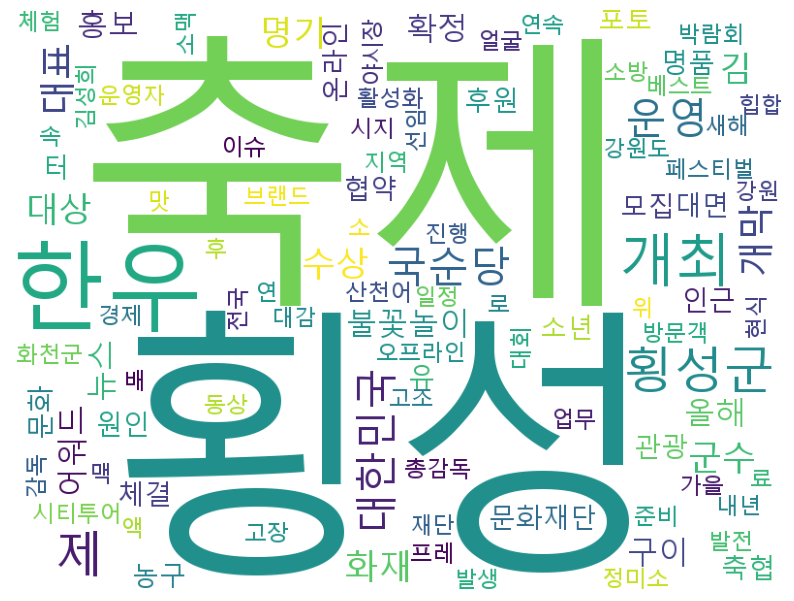

In [44]:
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter

# text 파일 읽어오기
#※※주소불러올때 \를 //로 바꾸어주기※※
blog_text = open('C://Users//user//Desktop//축제데이터//횡성한우축제.txt','rt', encoding='UTF-8').read()
#print(blog_text)

# csv 파일일때
# import pandas as pd
# blog_text = pd.read_csv('csv파일.csv',encoding='utf-8')
# blog_text = blog_text['형태소분석할 컬럼명']

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(blog_text)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for word, tag in line if tag in ['Noun','Adjective'] and len(word) > 1]

#제외할 단어 추가
stop_words = "" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))

n_adj = [word for word in n_adj if not word in stop_words]
print(n_adj)

#print(line)
#print(n_adj)

#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)

# 이미지 추가(워드크라우드 모양 설정)
import numpy as np
from PIL import Image

# mask = Image.new("RGBA",(2555,2275), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
# image = Image.open('C://Users//user//Desktop//sdaf//star.png').convert("RGBA")
# x,y = image.size
# mask.paste(image,(0,0,x,y),image)
# mask = np.array(mask)

###WordCloud(워드크라우드) 만들기###
#폰트지정
font='C:\Windows\Fonts\malgun.ttf'
word_cloud = WordCloud(font_path=font, 
                       background_color='white',
                       width=800,height=600,
                       max_words=200   
                       ).generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
#cloud.to_file('상암맛집_wc.png')
#또는
plt.savefig('C://Users//user//Desktop//축제데이터//횡성한우축제.png', bbox_inches='tight')
plt.show()